In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/indian-candidates-for-general-election-2019/LS_2.0.csv")
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


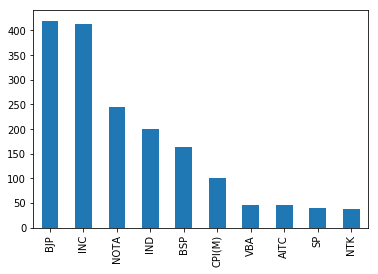

In [3]:
df['PARTY'].value_counts()[:10].plot(kind='bar')

In [4]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [5]:
df.columns = ["State","Constituency","Name","Winner","Party","Symbol","Gender","CrimeCases","Age","Category","Education","Assets","Liabilites","General Votes","Postal Votes","Total Votes","Over total Electors in Constituency","Over Total Votes Polled In Constituency","Total Electors"]

In [6]:
df.dropna(inplace=True)
df.head()

,State,Constituency,Name,Winner,Party,Symbol,Gender,CrimeCases,Age,Category,Education,Assets,Liabilites,General Votes,Postal Votes,Total Votes,Over total Electors in Constituency,Over Total Votes Polled In Constituency,Total Electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690


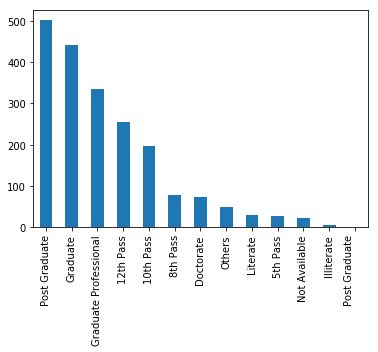

In [7]:
df['Education'].value_counts().plot.bar()

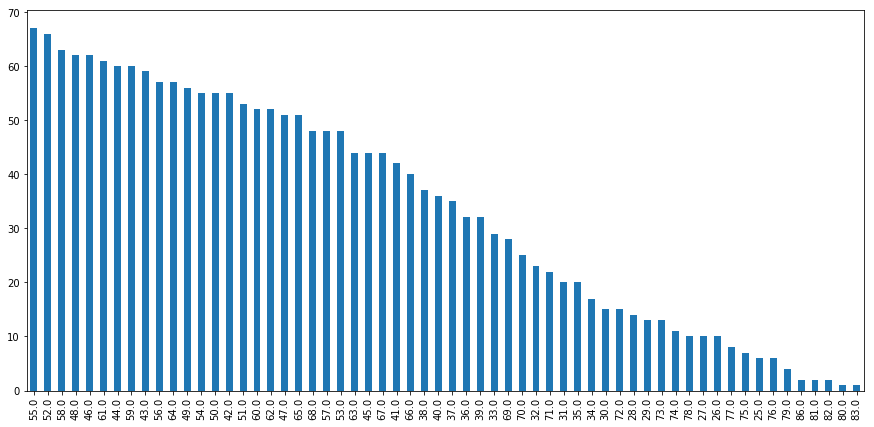

In [8]:
plt.figure(figsize=(15,7))
df['Age'].value_counts().plot.bar()

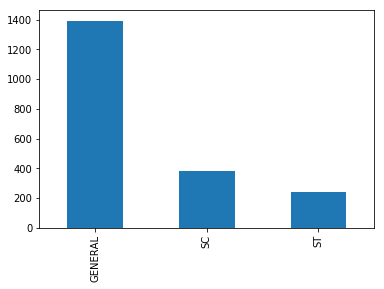

In [9]:
df['Category'].value_counts().plot.bar()

In [10]:
def changeAssetValue(x):
    try:
        temp = (x.split('Rs')[1].split('\n')[0].strip())
        temp2 = ''
        for i in temp.split(","):
            temp2 = i+temp2
        return temp2
    except:
        x = 0
        return x
def changeLiabilitesValue(x):
    try:
        temp = x.split('Rs')[1].split('\n')[0].strip()
        temp2 = ''
        for i in temp.split(","):
            temp2 = i+temp2
        return temp2
    except:
        x = 0
        return x
    

In [11]:
df['Assets'] = df['Assets'].apply(changeAssetValue)
df['Liabilites'] = df['Liabilites'].apply(changeLiabilitesValue)

In [12]:
df.head()

,State,Constituency,Name,Winner,Party,Symbol,Gender,CrimeCases,Age,Category,Education,Assets,Liabilites,General Votes,Postal Votes,Total Votes,Over total Electors in Constituency,Over Total Votes Polled In Constituency,Total Electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,4149930,450312,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,88877841,000478,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,00091643,00000531,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,03674427,5220686,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,385843713,89151222,434199,1130,435329,22.466390,37.999125,1937690


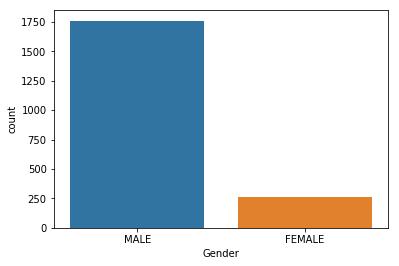

In [13]:
sns.countplot(df['Gender'])

In [14]:
df['Assets'] = df['Assets'].astype('int64')
print("Total Assets of Indian Policitions:",df['Assets'].sum())

Total Assets of Indian Policitions: 470689505401


In [15]:
df['Liabilites'] = df['Liabilites'].astype('int64')
print("Total Liabilites of Indian Policitions:",df['Liabilites'].sum())

Total Liabilites of Indian Policitions: 62391972094


In [16]:
df['Assets'].sum()-df['Liabilites'].sum()

408297533307

In [17]:
df['Assets'].mean()
# Average 20 cr.

233245542.81516352

In [18]:
df['Liabilites'].mean()
# Average 2 cr.

30917726.50842418

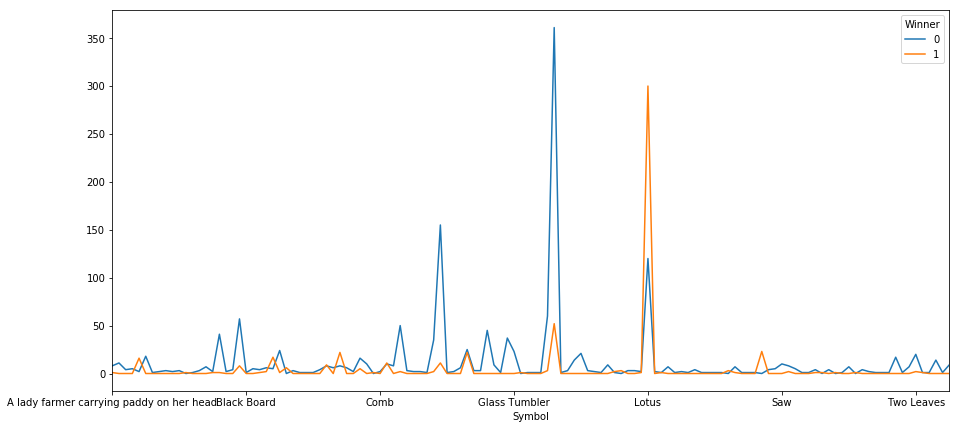

In [19]:
pd.crosstab(df['Symbol'],df['Winner']).plot(figsize=(15,7))

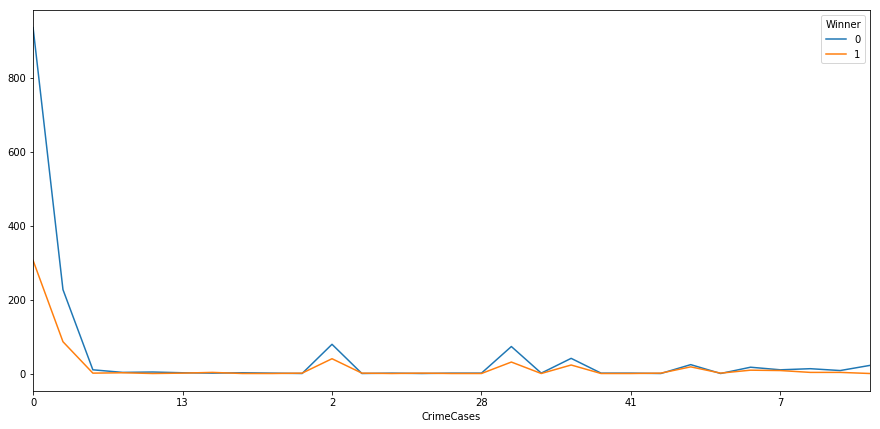

In [20]:
pd.crosstab(df['CrimeCases'],df['Winner']).plot(figsize=(15,7))

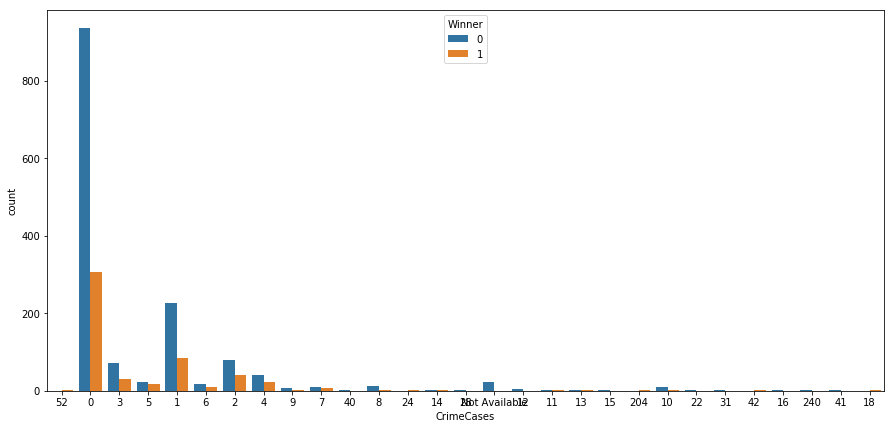

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(df['CrimeCases'],hue=df['Winner'])

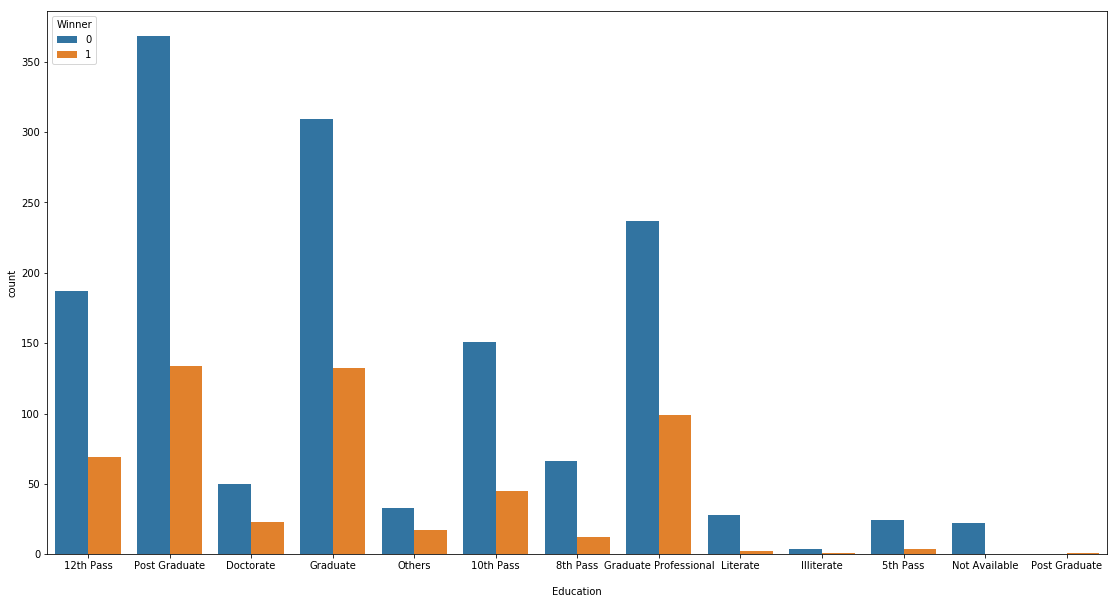

In [22]:
plt.figure(figsize=(19,10))
sns.countplot(df['Education'],hue=df['Winner'])

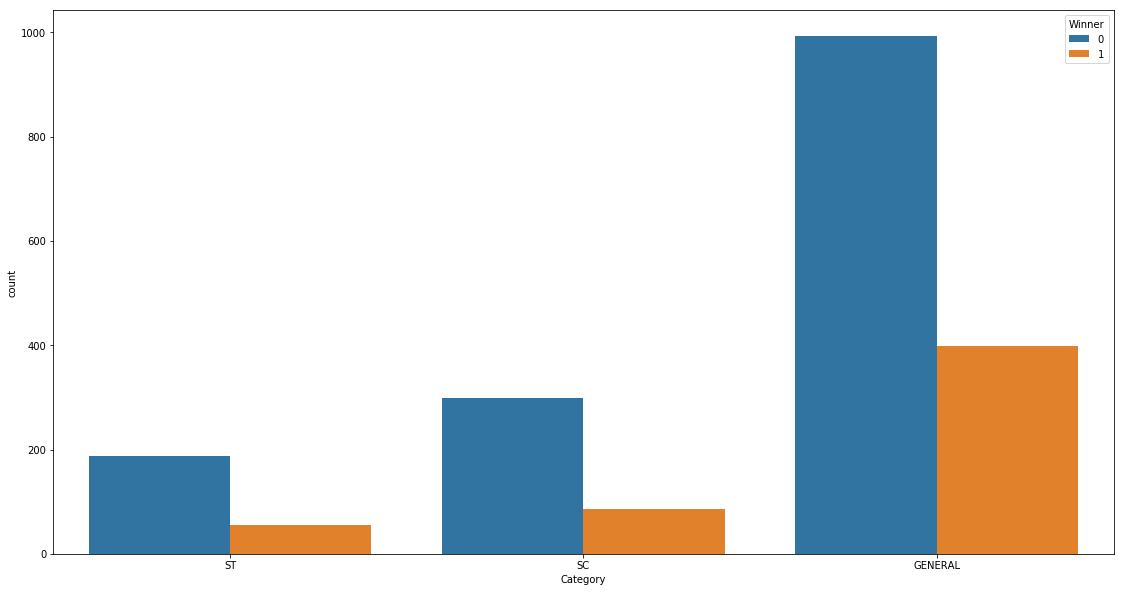

In [23]:
plt.figure(figsize=(19,10))
sns.countplot(df['Category'],hue=df['Winner'])

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [25]:
l = df.select_dtypes('object').columns
lb = LabelEncoder()
for i in l:
    df[i] = lb.fit_transform(df[i])

In [26]:
df.drop(['Name'],axis=1,inplace=True)
X = df.drop('Winner',axis=1)
y = df['Winner']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
models = [["LogisticRegression",LogisticRegression()],["DecisionTreeClassifier",DecisionTreeClassifier()],["ExtraTreeClassifier",ExtraTreeClassifier()],["GaussianNB",GaussianNB()],["KNeighborsClassifier",KNeighborsClassifier()]]
model_prediction = []

In [29]:
for i in models:
    model = i[1]
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    score = (accuracy_score(predict,y_test))
    model_prediction.append([i[0],score])

In [30]:
model_prediction = pd.DataFrame(model_prediction)
model_prediction.columns = ["Model Name","Score"]
model_prediction.sort_values(by='Score',ascending=False)

,Model Name,Score
1,DecisionTreeClassifier,0.929429
2,ExtraTreeClassifier,0.915916
0,LogisticRegression,0.888889
3,GaussianNB,0.863363
4,KNeighborsClassifier,0.690691
